# Day 4: Simulation and Visualization

In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

In [15]:
from ipywidgets import interact

## Activity 1: Projectile Motion

To model projectile motion, use the following equations to determine the x and y coordinates at a particular time step:

    x(t) = v0*t*cos(theta)
    y(t) = v0*t*sin(theta) - 1/2*g*t^2

where

    x(t)    x coordinate a time step t
    y(t)    y coordinate a time step t
    v0      the initial velocity
    theta   the initial angle
    g       gravity acceleration constant (9.81)
    t       time step (seconds)

To compute the displacement or the coordinates of the projectile over time, you should do something like the following:

    for each time step t in time range
        compute x(t)
        compute y(t)

    if y(t) < 0 # Stop once we hit the ground
        break

    store x(t), y(t)


In [3]:
import math

GRAVITY = 9.81

def simulate_projectile_motion(v0, theta, time_limit=100, time_step=0.1):
    ''' Simulate the motion of a projectile over time given:

        v0          The initial velocity
        theta       The initial angle
        time_limit  Maximum flight time
        time_step   The amount of time between calculating the displacement
        
    '''
    
    xs = []
    ys = []
    
    for i in range(int(time_limit / time_step)):
        t = i * time_step
        x = v0 * t * math.cos(theta)
        y = v0 * t * math.sin(theta) - (0.5 * GRAVITY * t**2)
        
        if y < 0:
            break
        
        xs.append(x)
        ys.append(y)
    
    return xs, ys
        

In [5]:
xs, ys = simulate_projectile_motion(50, math.radians(45))

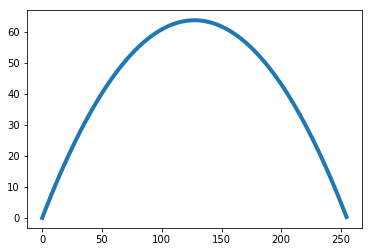

In [9]:
plt.plot(xs, ys, linewidth=4)

In [34]:
def visualize_projectile_motion(v0, theta):
    xs, ys = simulate_projectile_motion(v0, math.radians(theta))
    plt.figure(figsize=(10, 8))   # Make figure bigger
    plt.xlim([0, 1000])           # Set x range
    plt.ylim([0, 300])            # Set y range
    plt.plot(xs, ys, linewidth=4)
    plt.show()

In [33]:
interact(visualize_projectile_motion, v0=(0, 100), theta=(0, 90.0))

<function __main__.visualize_projectile_motion>

## Activity 2: Monte Carlo Simulation of Pi

In [41]:
import random

def simulate_pi(darts):
    ''' Perform a Monte Carlo simulation to determine the value of Pi '''
    
    circle_xs = []
    circle_ys = []
    square_xs = []
    square_ys = []
    
    for i in range(darts):
        x = random.random()
        y = random.random()
        if math.hypot(x, y) <= 1.0:
            circle_xs.append(x)
            circle_ys.append(y)
        else:
            square_xs.append(x)
            square_ys.append(y)
            
    in_circle = len(circle_xs)
    in_square = darts
            
    pi = 4.0 * in_circle / in_square
    
    return circle_xs, circle_ys, square_xs, square_ys, pi

In [44]:
cxs, cys, sxs, sys, pi = simulate_pi(100)
print pi

3.04


In [48]:
def visualize_pi(darts):
    cxs, cys, sxs, sys, pi = simulate_pi(darts)
    
    plt.figure(figsize=(10, 8))
    plt.scatter(cxs, cys, color='b')
    plt.scatter(sxs, sys, color='y')
    plt.show()
    
    print(pi)

In [50]:
interact(visualize_pi, darts=(0, 10000, 10))

<function __main__.visualize_pi>